# Importing Libraries

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import pathlib
import matplotlib.pyplot as plt

In [0]:
# Importing Tensorflow
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0


In [0]:
!pip install git+https://github.com/tensorflow/docs # Use some functions from tensorflow_docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-ufcwk31n
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-ufcwk31n
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0f6a904b5c1e41e43dc29e43665fe1d4aca929cf8_-cp36-none-any.whl size=114634 sha256=ae6322b51a29fdf2925c0d6d7cc4661dc6ef68da9c3eae0f37500a056fef4717
  Stored in directory: /tmp/pip-ephem-wheel-cache-nwvcme8e/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [0]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [82]:
#plotly used for plotting Interactive Graphs
!pip install plotly
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go

# Loading Dataset

In [0]:
dataset = pd.read_csv('final_data.csv')
dataset

,red,green,blue,label
0,20,139,240,Blue
1,174,83,72,Brown
2,144,249,131,Green
3,168,25,156,Pink
4,30,182,136,Green
...,...,...,...,...
5000,15,117,39,Green
5001,107,78,245,Blue
5002,110,176,82,Green
5003,97,192,125,Green


In [0]:
dataset.describe()

,red,green,blue
count,5005.000000,5005.000000,5005.000000
mean,127.732468,126.623776,128.658741
std,73.494665,74.474670,73.715089
min,0.000000,0.000000,0.000000
25%,64.000000,61.000000,64.000000
50%,128.000000,127.000000,130.000000
75%,191.000000,191.000000,192.000000
max,254.000000,254.000000,254.000000


In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5005 entries, 0 to 5004
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   red     5005 non-null   int64 
 1   green   5005 non-null   int64 
 2   blue    5005 non-null   int64 
 3   label   5005 non-null   object
dtypes: int64(3), object(1)
memory usage: 156.5+ KB


# Pre Process, Clean the Data

## Eliminate Null if it exists

In [0]:
#To find whether null entries are present 
dataset.isnull().sum()

red      0
green    0
blue     0
label    0
dtype: int64

## Converting Categorical Data of 'label` into Numerical

In [0]:
dataset.label.unique()

array(['Blue', 'Brown', 'Green', 'Pink', 'Yellow', 'Orange', 'Purple',
       'Red', 'Grey', 'White', 'Black'], dtype=object)

In [0]:
# One-Hot-Encoding
dataset = pd.get_dummies(dataset, columns=['label'])
dataset

,red,green,blue,label_Black,label_Blue,label_Brown,label_Green,label_Grey,label_Orange,label_Pink,label_Purple,label_Red,label_White,label_Yellow
0,20,139,240,0,1,0,0,0,0,0,0,0,0,0
1,174,83,72,0,0,1,0,0,0,0,0,0,0,0
2,144,249,131,0,0,0,1,0,0,0,0,0,0,0
3,168,25,156,0,0,0,0,0,0,1,0,0,0,0
4,30,182,136,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,15,117,39,0,0,0,1,0,0,0,0,0,0,0
5001,107,78,245,0,1,0,0,0,0,0,0,0,0,0
5002,110,176,82,0,0,0,1,0,0,0,0,0,0,0
5003,97,192,125,0,0,0,1,0,0,0,0,0,0,0


## Reorder

In [0]:
dataset = dataset[['red', 'green', 'blue', 'label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]
dataset

,red,green,blue,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
0,20,139,240,0,0,1,0,0,0,0,0,0,0,0
1,174,83,72,0,0,0,0,0,0,0,1,0,0,0
2,144,249,131,0,1,0,0,0,0,0,0,0,0,0
3,168,25,156,0,0,0,0,0,1,0,0,0,0,0
4,30,182,136,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,15,117,39,0,1,0,0,0,0,0,0,0,0,0
5001,107,78,245,0,0,1,0,0,0,0,0,0,0,0
5002,110,176,82,0,1,0,0,0,0,0,0,0,0,0
5003,97,192,125,0,1,0,0,0,0,0,0,0,0,0


# Data Correlation

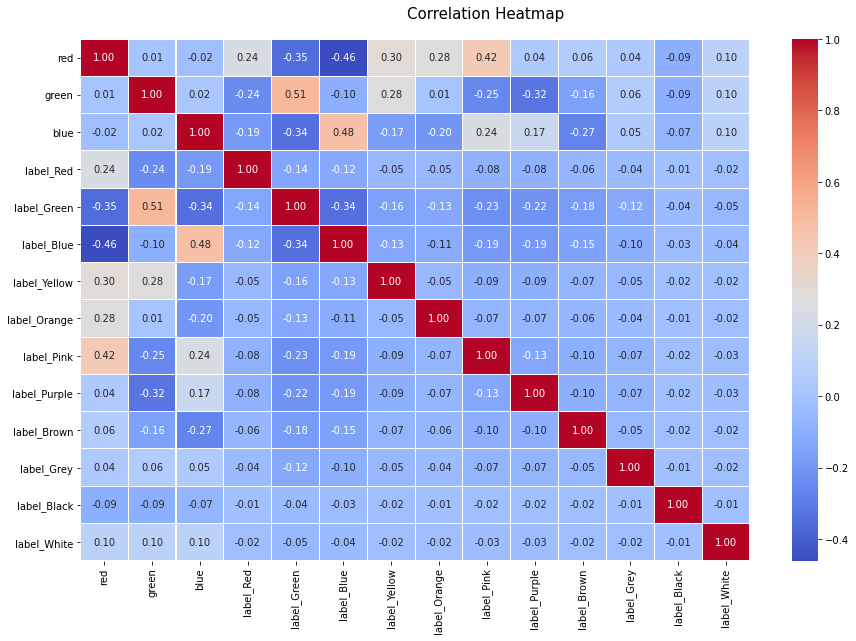

In [0]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 9))
corr = dataset.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=15)

# Split the data into train and test

In [29]:
train_dataset = dataset.sample(frac=0.8, random_state=9) #train = 80%,  random_state = any int value means every time when you run your program you will get the same output for train and test dataset, random_state is None by default which means every time when you run your program you will get different output because of splitting between train and test varies within 
test_dataset = dataset.drop(train_dataset.index) #remove train_dataset from dataframe to get test_dataset
train_dataset

,red,green,blue,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
3319,81,53,243,0,0,1,0,0,0,0,0,0,0,0
3450,254,118,250,0,0,0,0,0,1,0,0,0,0,0
1942,127,53,69,0,0,0,0,0,0,0,1,0,0,0
1803,162,4,242,0,0,0,0,0,0,1,0,0,0,0
4583,13,57,85,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2768,91,197,240,0,0,1,0,0,0,0,0,0,0,0
4239,167,88,12,0,0,0,0,0,0,0,1,0,0,0
1745,87,237,62,0,1,0,0,0,0,0,0,0,0,0
2291,190,132,64,0,0,0,0,0,0,0,1,0,0,0


In [30]:
test_dataset

,red,green,blue,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
0,20,139,240,0,0,1,0,0,0,0,0,0,0,0
3,168,25,156,0,0,0,0,0,1,0,0,0,0,0
11,249,99,108,0,0,0,0,0,1,0,0,0,0,0
12,24,161,177,0,0,1,0,0,0,0,0,0,0,0
14,125,103,236,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,55,248,149,0,1,0,0,0,0,0,0,0,0,0
4993,11,200,35,0,1,0,0,0,0,0,0,0,0,0
4994,101,130,192,0,0,1,0,0,0,0,0,0,0,0
4996,221,153,34,0,0,0,0,1,0,0,0,0,0,0


## Split features: `red`, `green`, `blue` and labels

In [31]:
train_labels = pd.DataFrame([train_dataset.pop(x) for x in ['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]).T
train_labels

,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
3319,0,0,1,0,0,0,0,0,0,0,0
3450,0,0,0,0,0,1,0,0,0,0,0
1942,0,0,0,0,0,0,0,1,0,0,0
1803,0,0,0,0,0,0,1,0,0,0,0
4583,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2768,0,0,1,0,0,0,0,0,0,0,0
4239,0,0,0,0,0,0,0,1,0,0,0
1745,0,1,0,0,0,0,0,0,0,0,0
2291,0,0,0,0,0,0,0,1,0,0,0


In [32]:
train_dataset

,red,green,blue
3319,81,53,243
3450,254,118,250
1942,127,53,69
1803,162,4,242
4583,13,57,85
...,...,...,...
2768,91,197,240
4239,167,88,12
1745,87,237,62
2291,190,132,64


In [33]:
test_labels = pd.DataFrame([test_dataset.pop(x) for x in ['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]).T
test_labels

,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0
11,0,0,0,0,0,1,0,0,0,0,0
12,0,0,1,0,0,0,0,0,0,0,0
14,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4988,0,1,0,0,0,0,0,0,0,0,0
4993,0,1,0,0,0,0,0,0,0,0,0
4994,0,0,1,0,0,0,0,0,0,0,0
4996,0,0,0,0,1,0,0,0,0,0,0


In [0]:
test_dataset

,red,green,blue
0,20,139,240
3,168,25,156
11,249,99,108
12,24,161,177
14,125,103,236
...,...,...,...
4988,55,248,149
4993,11,200,35
4994,101,130,192
4996,221,153,34


# Build & Compile the Model

## Set up the layers

In [0]:
from keras import regularizers
model = keras.Sequential([
    layers.Dense(3, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=[len(train_dataset.keys())]), #inputshape=[3]
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(11)
  ])

## Compile the model

In [0]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_13 (Dense)             (None, 24)                96        
_________________________________________________________________
dense_14 (Dense)             (None, 11)                275       
Total params: 383
Trainable params: 383
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [0]:
history = model.fit(x=train_dataset, y=train_labels, 
                    validation_split=0.3, 
                    epochs=10001, 
                    batch_size=48, 
                    verbose=0,
                    callbacks=[tfdocs.modeling.EpochDots()], 
                    shuffle=True)


Epoch: 0, accuracy:0.1167,  loss:15.2542,  val_accuracy:0.3020,  val_loss:5.9221,  
....................................................................................................
Epoch: 100, accuracy:0.7223,  loss:0.6345,  val_accuracy:0.7296,  val_loss:0.6229,  
....................................................................................................
Epoch: 200, accuracy:0.7702,  loss:0.5441,  val_accuracy:0.7587,  val_loss:0.5735,  
....................................................................................................
Epoch: 300, accuracy:0.7994,  loss:0.5037,  val_accuracy:0.7754,  val_loss:0.5366,  
....................................................................................................
Epoch: 400, accuracy:0.8308,  loss:0.4257,  val_accuracy:0.8195,  val_loss:0.4507,  
....................................................................................................
Epoch: 500, accuracy:0.8747,  loss:0.3342,  val_accuracy:0.8594,  val_

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
9996,0.268287,0.890435,0.373256,0.857737,9996
9997,0.264617,0.895075,0.386736,0.866057,9997
9998,0.262233,0.897573,0.373922,0.863561,9998
9999,0.263340,0.899714,0.376406,0.867720,9999
10000,0.267564,0.895789,0.376120,0.865225,10000


In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'accuracy [Color]')

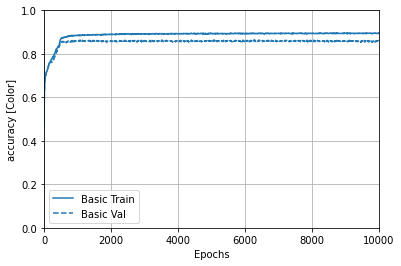

In [0]:
plotter.plot({'Basic': history}, metric = "accuracy")
plt.ylim([0, 1])
plt.ylabel('accuracy [Color]')

Text(0, 0.5, 'loss [Color]')

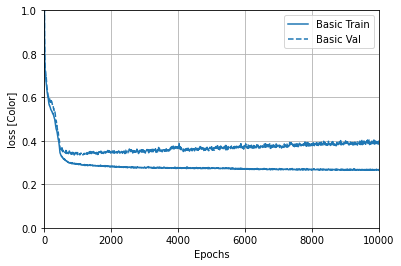

In [0]:
plotter.plot({'Basic': history}, metric = "loss")
plt.ylim([0, 1])
plt.ylabel('loss [Color]')

# Save Model

In [0]:
#Install PyDrive library into Google Colab notebook
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

In [0]:
#Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                       
drive = GoogleDrive(gauth)

In [0]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [0]:
# Save Model or weights on google drive and create on Colab directory in Google Drive

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('colormodel_acu_89.h5')
model_file = drive.CreateFile({'title' : 'colormodel_acu_89.h5'}) # colormodel_acu_  .h5 is the name of the model uploaded to Drive                   
model_file.SetContentFile('colormodel_acu_89.h5')                       
model_file.Upload()

In [0]:
# download to google drive                       
drive.CreateFile({'id': model_file.get('id')}) ### very important to run this last cell for loading the model in new notebook

GoogleDriveFile({'id': '14Jxscgqc0bF34V7Nlh7dmqS9rL0EV-Yy'})

In [0]:
#Load model from google drive into colab
file_obj = drive.CreateFile({'id': '14Jxscgqc0bF34V7Nlh7dmqS9rL0EV-Yy'})                       
file_obj.GetContentFile('colormodel_trained_89.h5') #colormodel_trained.h5 is the name of model uploaded to colab

In [36]:
ls

adc.json  colormodel_trained_89.h5  drive/  final_data.csv  sample_data/


In [37]:
# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model('colormodel_trained_89.h5') #very important

# Show the model architecture
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_13 (Dense)             (None, 24)                96        
_________________________________________________________________
dense_14 (Dense)             (None, 11)                275       
Total params: 383
Trainable params: 383
Non-trainable params: 0
_________________________________________________________________


# Make Prediction

The prediction by the ANN model is an array of 11 numbers. 

They represent the model's "confidence" that the RGB color corresponds to each of the 11 different classes of color as follows:

* 0 for Red
* 1 for Green
* 2 for Blue 
* 3 for Yellow
* 4 for Orange
* 5 for Pink
* 6 for Purple
* 7 for Brown
* 8 for Grey
* 9 for Black
* 10 for White 




You can see which out of the 11 labels has the highest confidence value 

## Train Dataset Prediction

In [38]:
train_predictions = model.predict(train_dataset)
train_predictions

array([[-1.45159497e+03, -9.19311981e+01,  1.60281677e+01, ...,
        -5.31841621e+01, -1.38194290e+02, -3.75688744e+01],
       [-2.95384460e+02, -1.57632217e+02, -1.08682434e+02, ...,
        -1.11155815e+02, -2.68150848e+02, -3.41254921e+01],
       [ 2.73200870e+00, -3.94391441e+00, -1.48897903e+02, ...,
        -4.51327801e+00, -1.44434464e+02, -6.25244293e+01],
       ...,
       [-7.10819397e+02,  2.65214291e+01, -8.56236219e-01, ...,
        -1.71013947e+01, -1.11367102e+03, -7.37005692e+01],
       [-6.66845417e+00, -3.04958248e+00, -1.98993149e+02, ...,
        -9.58117104e+00, -7.05867676e+02, -7.63229370e+01],
       [-8.53220215e+01, -3.15850258e+01, -4.46201591e+01, ...,
        -2.14530983e+01, -3.35549507e+01, -4.06006966e+01]], dtype=float32)

### Selecting Class with highest confidence

In [61]:
actual_encoded_train_labels = np.argmax(train_labels.to_numpy(), axis=1) #train_labels were originally in one-hot
actual_encoded_train_labels

array([2, 5, 7, ..., 1, 7, 6])

In [62]:
predicted_encoded_train_labels = np.argmax(train_predictions, axis=1)
predicted_encoded_train_labels

array([2, 5, 7, ..., 1, 7, 6])

### Converting numpy array to pandas dataframe

In [78]:
actual_encoded_train_labels = pd.DataFrame(actual_encoded_train_labels, columns=['Labels'])
actual_encoded_train_labels

,Labels
0,2
1,5
2,7
3,6
4,2
...,...
3999,2
4000,7
4001,1
4002,7


In [64]:
predicted_encoded_train_labels = pd.DataFrame(predicted_encoded_train_labels, columns=['Labels'])
predicted_encoded_train_labels

,Labels
0,2
1,5
2,7
3,6
4,2
...,...
3999,2
4000,7
4001,1
4002,7


### Visualize Prediction for Train Dataset

In [88]:
#Plot Actual vs Predicted Class for Training Dataset
actual_chart = go.Scatter(x=actual_encoded_train_labels.index, y=actual_encoded_train_labels.Labels, name= 'Actual Label')
predict_chart = go.Scatter(x=actual_encoded_train_labels.index, y=predicted_encoded_train_labels.Labels, name= 'Predicted Label')
py.iplot([predict_chart, actual_chart])

## Test Dataset Prediction

In [105]:
test_predictions = model.predict(test_dataset)
test_predictions

array([[-1.58302722e+03, -7.64244223e+00,  1.88653831e+01, ...,
         1.25160217e-02, -1.47531815e+02, -2.60393867e+01],
       [-1.38278427e+02, -1.03924072e+02, -1.00652954e+02, ...,
        -7.17310028e+01, -1.51663467e+02, -4.31833954e+01],
       [ 8.58559990e+00, -2.44478559e+00, -3.27335815e+02, ...,
        -2.16148262e+01, -5.42797974e+02, -9.64576187e+01],
       ...,
       [-8.12271851e+02, -3.51537085e+00,  1.06403341e+01, ...,
         3.43817997e+00, -8.27839508e+01, -2.00045261e+01],
       [-7.78367710e+00, -5.08272457e+00, -2.22560593e+02, ...,
        -1.62821426e+01, -1.01915076e+03, -7.89449921e+01],
       [-1.23760437e+03, -1.01077080e+02,  1.35246687e+01, ...,
        -5.88888702e+01, -1.52003204e+02, -3.46540527e+01]], dtype=float32)

### Selecting Class with highest confidence

In [106]:
actual_encoded_test_labels = np.argmax(test_labels.to_numpy(), axis=1) 
actual_encoded_test_labels

array([2, 5, 5, ..., 2, 4, 2])

In [107]:
predicted_encoded_test_labels = np.argmax(test_predictions, axis=1)
predicted_encoded_test_labels

array([2, 6, 0, ..., 2, 4, 2])

### Converting numpy array to pandas dataframe

In [108]:
actual_encoded_test_labels = pd.DataFrame(actual_encoded_test_labels, columns=['Labels'])
actual_encoded_test_labels

,Labels
0,2
1,5
2,5
3,2
4,2
...,...
996,1
997,1
998,2
999,4


In [109]:
predicted_encoded_test_labels = pd.DataFrame(predicted_encoded_test_labels, columns=['Labels'])
predicted_encoded_test_labels

,Labels
0,2
1,6
2,0
3,2
4,6
...,...
996,1
997,1
998,2
999,4


### Visualize Prediction for Test Dataset

In [96]:
#Plot Actual vs Predicted Class for Test Dataset
actual_chart = go.Scatter(x=actual_encoded_test_labels.index, y=actual_encoded_test_labels.Labels, name= 'Actual Label')
predict_chart = go.Scatter(x=actual_encoded_test_labels.index, y=predicted_encoded_test_labels.Labels, name= 'Predicted Label')
py.iplot([predict_chart, actual_chart])

# Evaluate Model

## Evaluating for Training Dataset

In [49]:
model.evaluate(x=train_dataset, y=train_labels)

126/126 [==============================] - 0s 1ms/step - loss: 0.2930 - accuracy: 0.8894


[0.29301711916923523, 0.8893606662750244]

In [115]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix_train = confusion_matrix(actual_encoded_train_labels, predicted_encoded_train_labels)
confusion_matrix_train

array([[ 158,    0,    0,    0,    9,   12,    1,   10,    0,    0,    0],
       [   0, 1100,   26,   20,    0,    1,    0,   10,   10,    0,    1],
       [   0,   25,  794,    0,    0,    0,   25,    0,   12,    1,    1],
       [   0,   21,    0,  181,   16,    0,    0,    6,    1,    0,    0],
       [  17,    0,    0,    3,  139,    1,    0,    7,    0,    0,    0],
       [  16,    0,    0,    0,    0,  375,   51,    8,    1,    0,    0],
       [   1,    0,   19,    0,    0,   28,  389,    4,    6,    1,    2],
       [   8,    1,    0,    4,    7,    3,    2,  282,    4,    0,    0],
       [   0,    2,    7,    1,    0,    2,    7,    8,  115,    0,    2],
       [   0,    0,    0,    0,    0,    0,    1,    0,    1,   14,    0],
       [   0,    0,    2,    0,    0,    0,    0,    0,    8,    0,   14]])

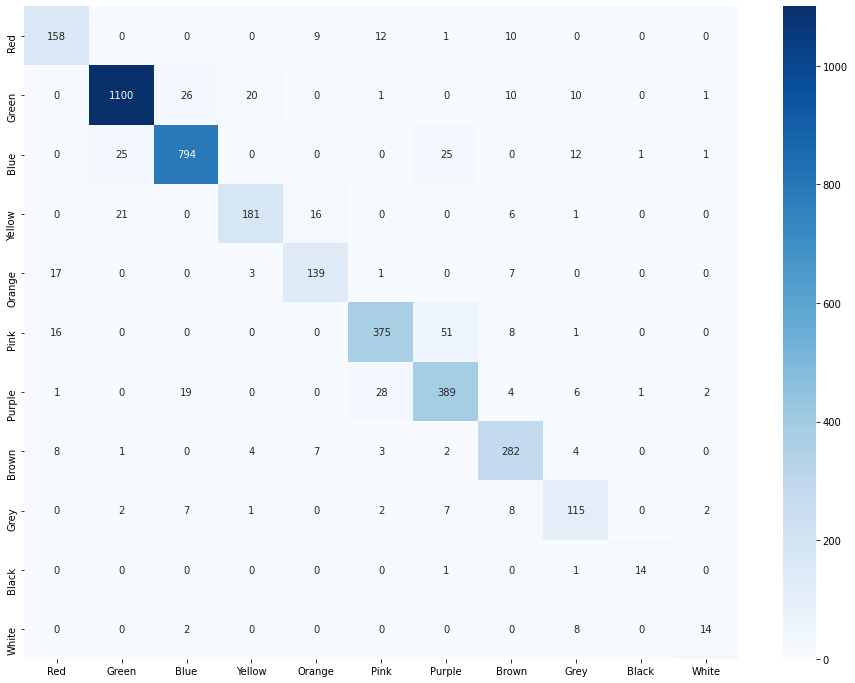

In [133]:
f,ax = plt.subplots(figsize=(16,12))
categories = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
sns.heatmap(confusion_matrix_train, annot=True, cmap='Blues', fmt='d',
            xticklabels = categories,
            yticklabels = categories)
plt.show()

In [103]:
target_names = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
print(classification_report(actual_encoded_train_labels, predicted_encoded_train_labels, target_names=target_names))

              precision    recall  f1-score   support

         Red       0.79      0.83      0.81       190
       Green       0.96      0.94      0.95      1168
        Blue       0.94      0.93      0.93       858
      Yellow       0.87      0.80      0.83       225
      Orange       0.81      0.83      0.82       167
        Pink       0.89      0.83      0.86       451
      Purple       0.82      0.86      0.84       450
       Brown       0.84      0.91      0.87       311
        Grey       0.73      0.80      0.76       144
       Black       0.88      0.88      0.88        16
       White       0.70      0.58      0.64        24

    accuracy                           0.89      4004
   macro avg       0.84      0.84      0.84      4004
weighted avg       0.89      0.89      0.89      4004



## Evaluating for Test Dataset

In [50]:
model.evaluate(x=test_dataset, y=test_labels)

32/32 [==============================] - 0s 1ms/step - loss: 0.4383 - accuracy: 0.8661


[0.438273549079895, 0.8661338686943054]

In [116]:
confusion_matrix_test = confusion_matrix(actual_encoded_test_labels, predicted_encoded_test_labels)
confusion_matrix_test

array([[ 36,   0,   0,   0,   2,   4,   0,   4,   0,   0,   0],
       [  0, 263,   5,   6,   0,   0,   0,   1,   6,   1,   1],
       [  0,  10, 219,   0,   0,   0,  11,   0,   2,   1,   0],
       [  0,   5,   0,  49,   5,   0,   0,   1,   0,   0,   0],
       [  2,   0,   0,   0,  31,   0,   0,   5,   0,   0,   0],
       [  6,   0,   0,   0,   0, 110,  10,   2,   0,   0,   0],
       [  0,   0,   4,   0,   0,   7,  79,   2,   1,   2,   0],
       [  3,   0,   0,   0,   4,   0,   3,  51,   3,   0,   0],
       [  0,   1,   2,   0,   0,   0,   0,   4,  25,   0,   1],
       [  0,   0,   1,   0,   0,   0,   0,   0,   2,   1,   0],
       [  0,   0,   1,   0,   1,   0,   0,   0,   2,   0,   3]])

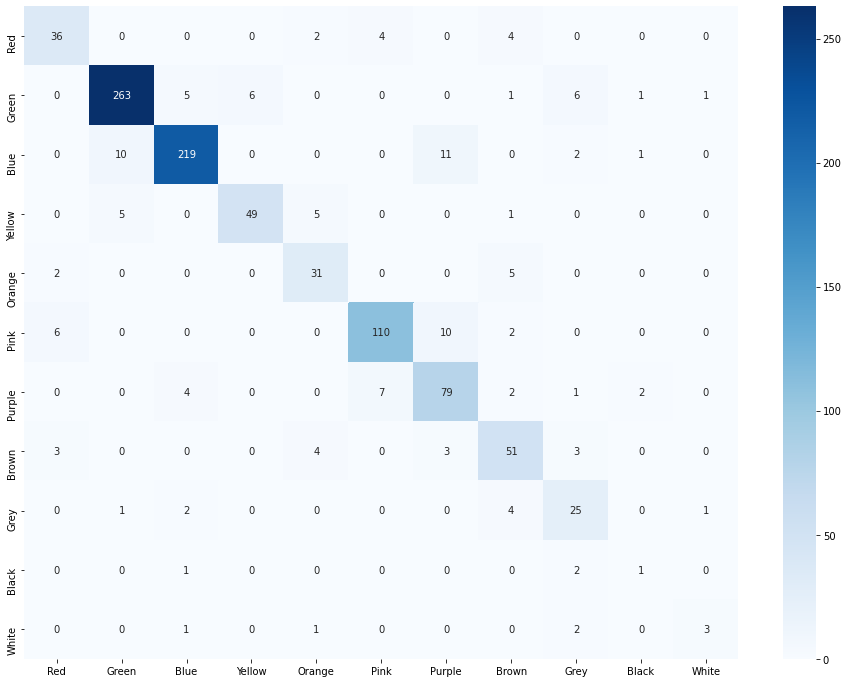

In [127]:
f,ax = plt.subplots(figsize=(16,12))
categories = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
sns.heatmap(confusion_matrix_test, annot=True, cmap='Blues', fmt='d',
            xticklabels = categories,
            yticklabels = categories)
plt.show()

In [117]:
target_names = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
print(classification_report(actual_encoded_test_labels, predicted_encoded_test_labels, target_names=target_names))

              precision    recall  f1-score   support

         Red       0.77      0.78      0.77        46
       Green       0.94      0.93      0.94       283
        Blue       0.94      0.90      0.92       243
      Yellow       0.89      0.82      0.85        60
      Orange       0.72      0.82      0.77        38
        Pink       0.91      0.86      0.88       128
      Purple       0.77      0.83      0.80        95
       Brown       0.73      0.80      0.76        64
        Grey       0.61      0.76      0.68        33
       Black       0.20      0.25      0.22         4
       White       0.60      0.43      0.50         7

    accuracy                           0.87      1001
   macro avg       0.73      0.74      0.74      1001
weighted avg       0.87      0.87      0.87      1001

